# Ad Campaign Performance: Exploratory Data Analysis

`The Ad Campaign Performance project conducts an A/B hypothesis testing on an Ad campaign. During the Ad campaign, SmartAd, a mobile first advertising company is running an online Ad for brand Lux. SmartAd company runs two versions of an Ad, a creative Ad which was presented to the exposed group and a dummy Ad which was presented to the control group. The main objective of the project is to determine through A/B hypothesis testing whether the creative Ad results to a significant lift in the brand awareness. This notebook conducts preprocessing and exploratory data analysis on the data generated during the campaign.`

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [ ]:
import sys
sys.path.append('../scripts')
from data_preprocessing import 

# Data Ingestion

In [2]:
data = pd.read_csv('../data/AdSmartABdata.csv')
data.head()

,auction_id,experiment,date,hour,device_make,platform_os,browser,yes,no
0,0008ef63-77a7-448b-bd1e-075f42c55e39,exposed,2020-07-10,8,Generic Smartphone,6,Chrome Mobile,0,0
1,000eabc5-17ce-4137-8efe-44734d914446,exposed,2020-07-07,10,Generic Smartphone,6,Chrome Mobile,0,0
2,0016d14a-ae18-4a02-a204-6ba53b52f2ed,exposed,2020-07-05,2,E5823,6,Chrome Mobile WebView,0,1
3,00187412-2932-4542-a8ef-3633901c98d9,control,2020-07-03,15,Samsung SM-A705FN,6,Facebook,0,0
4,001a7785-d3fe-4e11-a344-c8735acacc2c,control,2020-07-03,15,Generic Smartphone,6,Chrome Mobile,0,0


In [3]:
df = data.copy()

In [4]:
print(f" There are {df.shape[0]} rows and {df.shape[1]} columns")

 There are 8077 rows and 9 columns


In [6]:
df.isna().sum()

auction_id     0
experiment     0
date           0
hour           0
device_make    0
platform_os    0
browser        0
yes            0
no             0
dtype: int64

# EDA

In [7]:
df['yes'].value_counts()

0    7505
1     572
Name: yes, dtype: int64

In [9]:
df['no'].value_counts()

0    7406
1     671
Name: no, dtype: int64

In [10]:
df['experiment'].value_counts()

control    4071
exposed    4006
Name: experiment, dtype: int64

In [11]:
df['device_make'].value_counts()

Generic Smartphone     4743
iPhone                  433
Samsung SM-G960F        203
Samsung SM-G973F        154
Samsung SM-G950F        148
                       ... 
Samsung SM-A505F          1
D5803                     1
Samsung SM-G6100          1
HTC M10h                  1
XiaoMi Redmi Note 5       1
Name: device_make, Length: 270, dtype: int64

In [12]:
df['auction_id'].value_counts()

0008ef63-77a7-448b-bd1e-075f42c55e39    1
aa14b324-5c46-4b3a-8e75-18d78968495b    1
aa84454c-a749-4c98-bf9f-1f99c04416af    1
aa6ecb40-6a48-4c06-a611-4c9aa9023ea8    1
aa6c6cda-e498-4e8f-b886-1d969bd376ea    1
                                       ..
56c87344-e876-41a3-9011-feb8f7e58cd5    1
56bf959a-642f-4814-bf08-55d634554d5a    1
56bd072c-a748-4355-b2d1-258d82d401b0    1
56bb25c7-f778-4690-90be-034b1982fe03    1
fffbb9ff-568a-41a5-a0c3-6866592f80d8    1
Name: auction_id, Length: 8077, dtype: int64

In [13]:
df['browser'].value_counts()

Chrome Mobile                 4554
Chrome Mobile WebView         1489
Samsung Internet               824
Facebook                       764
Mobile Safari                  337
Chrome Mobile iOS               51
Mobile Safari UI/WKWebView      44
Chrome                           3
Pinterest                        3
Opera Mobile                     3
Opera Mini                       1
Edge Mobile                      1
Android                          1
Firefox Mobile                   1
Puffin                           1
Name: browser, dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8077 entries, 0 to 8076
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   auction_id   8077 non-null   object
 1   experiment   8077 non-null   object
 2   date         8077 non-null   object
 3   hour         8077 non-null   int64 
 4   device_make  8077 non-null   object
 5   platform_os  8077 non-null   int64 
 6   browser      8077 non-null   object
 7   yes          8077 non-null   int64 
 8   no           8077 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 568.0+ KB


In [17]:
# Prints Summary of Categorical Data
df.describe(include=[object])

,auction_id,experiment,date,device_make,browser
count,8077,8077,8077,8077,8077
unique,8077,2,8,270,15
top,0008ef63-77a7-448b-bd1e-075f42c55e39,control,2020-07-03,Generic Smartphone,Chrome Mobile
freq,1,4071,2015,4743,4554


In [18]:
# showing the experiment unique values
df['experiment'].unique()

array(['exposed', 'control'], dtype=object)

In [25]:
user_grp = df.groupby(['experiment']) 

user_grp.experiment.value_counts()

experiment  experiment
control     control       4071
exposed     exposed       4006
Name: experiment, dtype: int64

<AxesSubplot:>

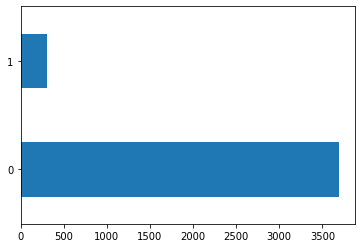

In [26]:
user_grp.get_group('exposed')['yes'].value_counts()[0:5].plot(kind='barh')

In [28]:
user_grp['yes'].value_counts()

experiment  yes
control     0      3807
            1       264
exposed     0      3698
            1       308
Name: yes, dtype: int64

`This graph shows from the exposed users who takes the new advert quiz only around 308 of the users says yes and the rest says no`

<AxesSubplot:>

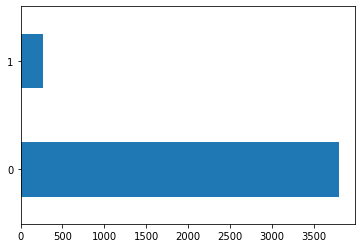

In [29]:
user_grp.get_group('control')['yes'].value_counts()[0:5].plot(kind='barh')

<AxesSubplot:>

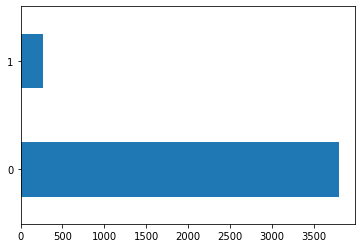

In [31]:
user_grp.get_group('control')['yes'].value_counts()[0:5].plot(kind='barh')

`This graph shows from the control users who takes the dummy add only around 264 of the users says yes and the rest says no`

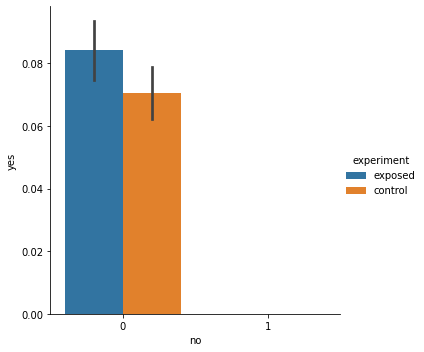

In [32]:
sns.catplot(x="no", y="yes", hue="experiment", kind="bar", data=df)

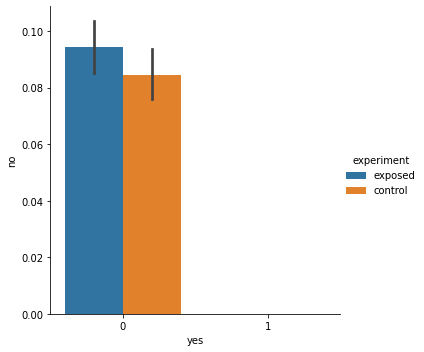

In [33]:
sns.catplot(x="yes", y="no", hue="experiment", kind="bar", data=df)

## A/B HYPOTHESIS TESTING

In [35]:
numerical_column = df.select_dtypes(exclude="object").columns.tolist()
categorical_column = df.select_dtypes(include="object").columns.tolist()


<b>The test given for the two groups</b>

`control user` - <i>who have been shown the dummy ad exposed user => users who have been shown a creative (ad) that was designed by SmartAd for the client.</i>

`NUll HYPOTHESIS` - <i>NO ALTERNATE HYTPOTHESIS = YES </i>


In [37]:
# mean value for the null hypothesis
df['no'].mean()

0.0830753992819116

In [39]:
df.describe()

,hour,platform_os,yes,no
count,8077.000000,8077.000000,8077.000000,8077.000000
mean,11.615080,5.947134,0.070818,0.083075
std,5.734879,0.224333,0.256537,0.276013
min,0.000000,5.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.000000
50%,13.000000,6.000000,0.000000,0.000000
75%,15.000000,6.000000,0.000000,0.000000
max,23.000000,7.000000,1.000000,1.000000
